In [1]:
#%matplotlib inline
%matplotlib notebook

# conda install basemap netCDF4

In [2]:
from mpl_toolkits.basemap import Basemap as Basemap
import numpy as np
import matplotlib.pyplot as plt

## read in data.

In [3]:
# read in data.
file = open('data/fcover.dat','r')
ul=[];vl=[];pl=[]
nlons=73; nlats=73
dellat = 2.5; dellon = 5.

for line in file.readlines():
   l = line.replace('\n','').split()
   ul.append(float(l[0]))
   vl.append(float(l[1]))
   pl.append(float(l[2]))
    
u = np.reshape(np.array(ul,np.float32),(nlats,nlons))
v = np.reshape(np.array(vl,np.float32),(nlats,nlons))
p = np.reshape(np.array(pl,np.float32),(nlats,nlons))

lats1 = -90.+dellat*np.arange(nlats)
lons1 = -180.+dellon*np.arange(nlons)
lons, lats = np.meshgrid(lons1, lats1)

## plot vectors in geographical (lat/lon) coordinates.
### north polar projection.

<IPython.core.display.Javascript object>


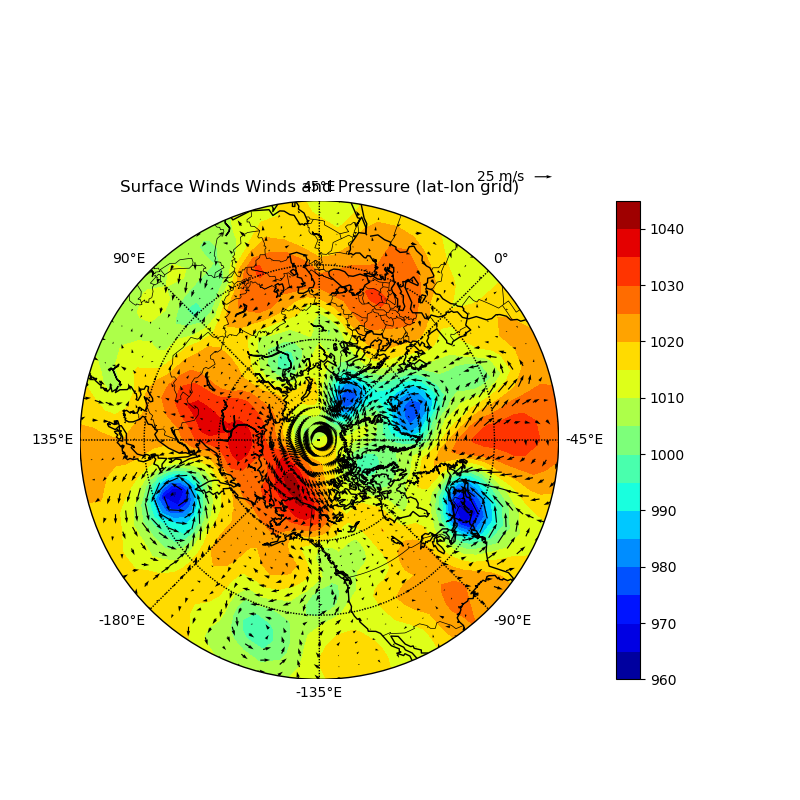

In [4]:
# plot vectors in geographical (lat/lon) coordinates.
# north polar projection.
m = Basemap(lon_0=-135,boundinglat=25,round=True,
            resolution='c',area_thresh=10000.,projection='npstere')

# create a figure, add an axes.
fig=plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.7,0.7])

### rotate wind vectors to map projection coordinates.
 (also compute native map projections coordinates of lat/lon grid)<br>
 only do Northern Hemisphere.

In [ ]:
# rotate wind vectors to map projection coordinates.
# (also compute native map projections coordinates of lat/lon grid)
# only do Northern Hemisphere.
urot,vrot,x,y = m.rotate_vector(u[36:,:],v[36:,:],lons[36:,:],lats[36:,:],returnxy=True)

### plot filled contours over map.

In [ ]:
# plot filled contours over map.
cs = m.contourf(x,y,p[36:,:],15,cmap=plt.cm.jet)

### plot wind vectors over map.

In [ ]:
# plot wind vectors over map.
Q = m.quiver(x,y,urot,vrot) #or specify, e.g., width=0.003, scale=400)
qk = plt.quiverkey(Q, 0.95, 1.05, 25, '25 m/s', labelpos='W')

### draw a colorbar, parallels, meridians, and title

In [5]:
m.colorbar(pad='12%') # draw colorbar
m.drawcoastlines()
m.drawcountries()

# draw parallels
delat = 20.
circles = np.arange(0.,90.+delat,delat).tolist()+\
          np.arange(-delat,-90.-delat,-delat).tolist()
m.drawparallels(circles,labels=[1,1,1,1])

# draw meridians
delon = 45.
meridians = np.arange(-180,180,delon)
m.drawmeridians(meridians,labels=[1,1,1,1])

plt.title('Surface Winds and Pressure (lat-lon grid)',y=1.075)

Text(0.5, 1.075, 'Surface Winds Winds and Pressure (lat-lon grid)')

## plot vectors in map projection coordinates.
### north polar projection.

In [ ]:
# plot vectors in map projection coordinates.
# north polar projection.
m = Basemap(lon_0=-135,boundinglat=25,round=True,
            resolution='c',area_thresh=10000.,projection='npstere')

### transform from spherical to map projection coordinates 
(rotation and interpolation).

In [ ]:
# transform from spherical to map projection coordinates (rotation
# and interpolation).
nxv = 41; nyv = 41
nxp = 101; nyp = 101
spd = np.sqrt(u**2+v**2)
udat, vdat, xv, yv = m.transform_vector(u,v,lons1,lats1,nxv,nyv,returnxy=True)
pdat, xp, yp = m.transform_scalar(p,lons1,lats1,nxp,nyp,returnxy=True)

### create a figure, add an axes.

In [ ]:
# create a figure, add an axes.
fig=plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.7,0.7])

### plot image over map

In [ ]:
# plot image over map
im = m.imshow(pdat,plt.cm.jet)

### plot wind vectors over map.

In [ ]:
# plot wind vectors over map.
Q = m.quiver(xv,yv,udat,vdat) #or specify, e.g., width=0.003, scale=400)
qk = plt.quiverkey(Q, 0.95, 1.05, 25, '25 m/s', labelpos='W')

### draw a colorbar, parallels, meridians, and title

<IPython.core.display.Javascript object>


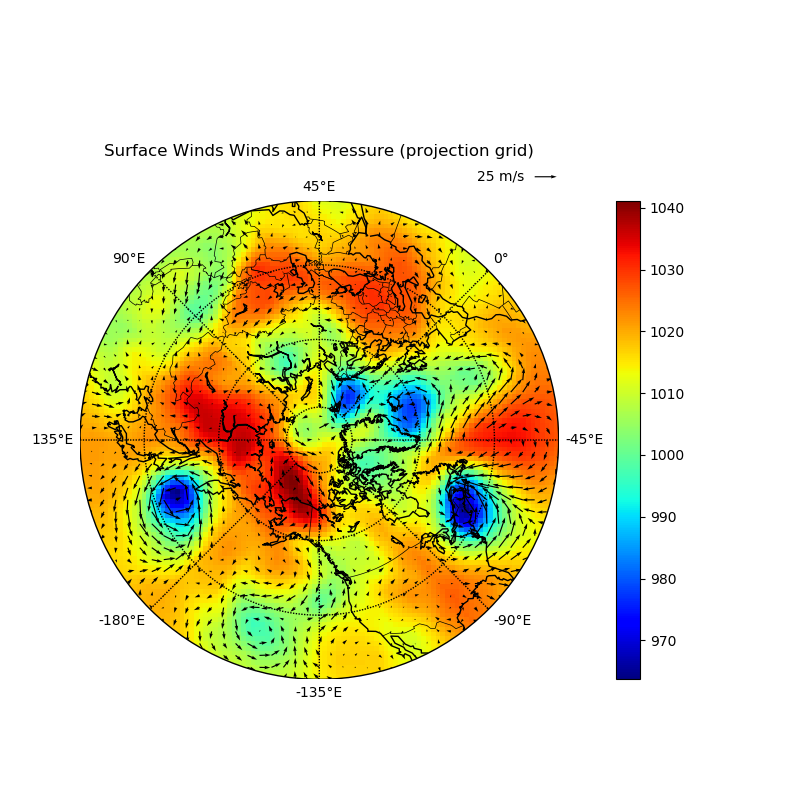

Text(0.5, 1.075, 'Surface Winds Winds and Pressure (projection grid)')

In [6]:
m.colorbar(pad='12%') # draw colorbar
m.drawcoastlines()
m.drawcountries()

# draw parallels
delat = 20.
circles = np.arange(0.,90.+delat,delat).tolist()+\
          np.arange(-delat,-90.-delat,-delat).tolist()
m.drawparallels(circles,labels=[1,1,1,1])

# draw meridians
delon = 45.
meridians = np.arange(-180,180,delon)
m.drawmeridians(meridians,labels=[1,1,1,1])

plt.title('Surface Winds and Pressure (projection grid)',y=1.075)
# plt.show()